In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

2025-02-24 19:06:41.526640: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-24 19:06:41.535640: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-24 19:06:41.624460: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-24 19:06:41.736742: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740403301.875222    1070 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740403301.90

In [2]:
tf.config.experimental.list_physical_devices()

2025-02-24 19:06:46.956138: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()


True

In [4]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
def plot_sample(index):
    plt.figure(figsize=(10,2))
    plt.imshow(X_train[index])

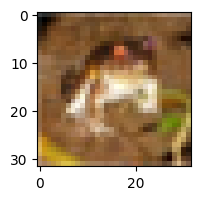

In [9]:
plot_sample(0)

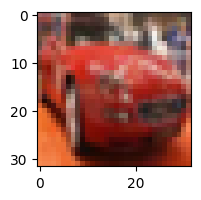

In [10]:
plot_sample(5)

In [11]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

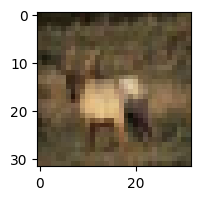

In [12]:
plot_sample(3)

In [13]:
y_train[3]

array([4], dtype=uint8)

In [14]:
classes[y_train[3][0]]

'deer'

In [15]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [16]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [17]:
y_train[:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

In [18]:
y_train_categorical = tf.keras.utils.to_categorical(y_train,num_classes = 10)

y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
y_test_categorical = tf.keras.utils.to_categorical(y_test,num_classes = 10)

In [20]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [21]:
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(3000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')

])

model.compile(optimizer='SGD',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train_scaled, y_train_categorical,epochs=10)

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.3085 - loss: 1.9280
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4146 - loss: 1.6484
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.4535 - loss: 1.5551
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.4722 - loss: 1.4917
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4973 - loss: 1.4353
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.5117 - loss: 1.3859
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.5232 - loss: 1.3541
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.5407 - loss: 1.3147
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.5495 - loss: 1.2820
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 39ms/step - accuracy: 0.5626 - loss: 1.2540


In [25]:
y_test[0]
classes[y_test[1][0]]

'ship'

In [24]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


'ship'

In [26]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5008 - loss: 1.4074


[1.4150646924972534, 0.49570000171661377]

In [33]:
def get_model():
    model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(3000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')

])

    model.compile(optimizer='SGD',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [35]:
%%timeit -n1 -r1
with tf.keras.device('/CPU:0'):
    model = get_model()
    history = model.fit(X_train_scaled, y_train_categorical, epochs=1)

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.2983 - loss: 1.9415
1min 4s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [36]:
%%timeit -n1 -r1
with tf.keras.device('/GPU:0'):
    model = get_model()
    history = model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.3049 - loss: 1.9311
1min 2s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
